<a href="https://colab.research.google.com/github/SophonWongyai/AIDL/blob/main/assignment_01_K_Means%26GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dev by Sophon Wongyai

---

# Knowledge

## Silhouette

<img src="https://miro.medium.com/max/1400/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg" alt=""/>

* Silhouette Score = (b-a)/max(a,b)
* score in range [-1, 1]
* if score limit to 1 is good

# Dataset
* [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

# Import Library

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

# Load Dataset

In [ ]:
!git clone https://github.com/SophonWongyai/AIDL

Cloning into 'AIDL'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 14), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [ ]:
path = '/content/AIDL/Cluster Analysis and Pattern Recoginition/Datasets'

In [ ]:
os.listdir(path)

['CC GENERAL.csv', 'wine-clustering.csv', 'README.md', 'Mall_Customers.csv']

In [ ]:
df = pd.read_csv(path + '/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Feature Selection

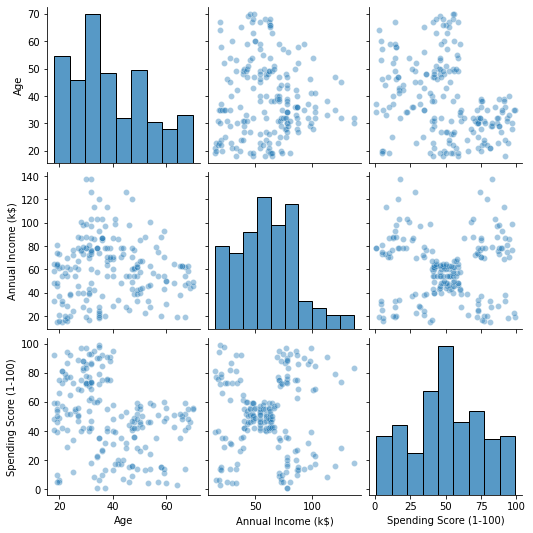

In [ ]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 
             plot_kws={'alpha': .4})

In [ ]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


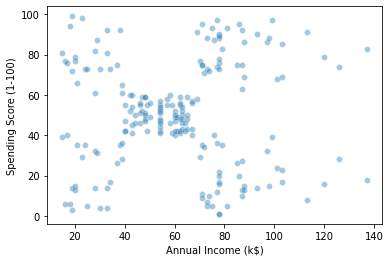

In [ ]:
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.4)

# Feature Scaling

In [ ]:
# scaler = StandardScaler()
X[features] = StandardScaler().fit_transform(X)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


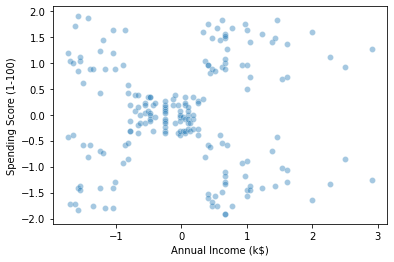

In [ ]:
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.4)

# Find Cluster Number

# Modeling

In [ ]:
seed = 0

## K-Means Clustering

### Elbow & Silhouette Score

cluster number= 2 , Score :  269.0167937490666 , Silhouette :  0.29512063001659344
cluster number= 3 , Score :  157.7040081503594 , Silhouette :  0.46658474419000145
cluster number= 4 , Score :  108.9213166136436 , Silhouette :  0.4939069237513199
cluster number= 5 , Score :  65.56840815571681 , Silhouette :  0.5546571631111091
cluster number= 6 , Score :  55.057348270386015 , Silhouette :  0.5398800926790663
cluster number= 7 , Score :  44.91118554999014 , Silhouette :  0.5263454490712252
cluster number= 8 , Score :  37.181757826821325 , Silhouette :  0.45620041477955225
cluster number= 9 , Score :  32.37525368158287 , Silhouette :  0.45532159949822093


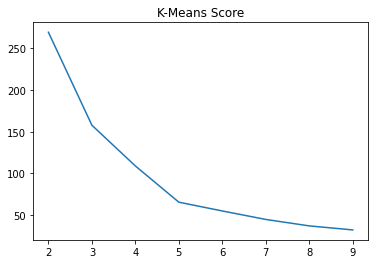

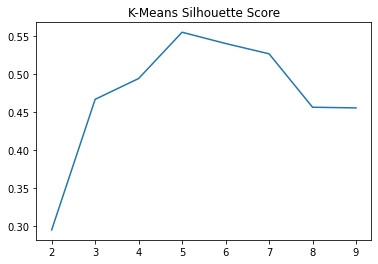

In [ ]:
scores = []
si_scores = []

k_start = 2
k_end = 10
k_list = range(k_start, k_end)

for k in k_list:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  kmeans.fit(X)
  cluster = kmeans.predict(X)
  
  score =  -kmeans.score(X)
  si_score = silhouette_score(X, cluster)

  scores.append(score)
  si_scores.append(si_score)
  
  print('cluster number=', k, ', Score : ', score, ', Silhouette : ', si_score)

plt.title('K-Means Score')
plt.plot(k_list, scores)
plt.xticks(k_list)
plt.show()

plt.title('K-Means Silhouette Score')
plt.plot(k_list, si_scores)
plt.xticks(k_list)
plt.show()

### K-Means

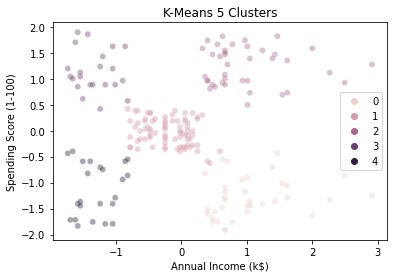

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X)
clusters = kmeans.predict(X)

plt.title('K-Means 5 Clusters')
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=clusters, alpha=0.4)

## Gaussian Mixture Model (GMM)

### Elbow & Silhouette Score

cluster number= 2 , Score :  2.7236755612353396 , Silhouette :  0.38206729230826825
cluster number= 3 , Score :  2.6541171977750957 , Silhouette :  0.43018957138806657
cluster number= 4 , Score :  2.4548221234248233 , Silhouette :  0.41339168343976207
cluster number= 5 , Score :  2.262502621973241 , Silhouette :  0.5536892843811245
cluster number= 6 , Score :  2.2245426937273636 , Silhouette :  0.5415596112409703
cluster number= 7 , Score :  2.1822260901789083 , Silhouette :  0.53075239086968
cluster number= 8 , Score :  2.1262539134538345 , Silhouette :  0.4187606710568021
cluster number= 9 , Score :  2.0980216237797458 , Silhouette :  0.4185918932825857


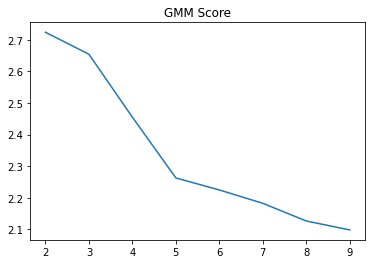

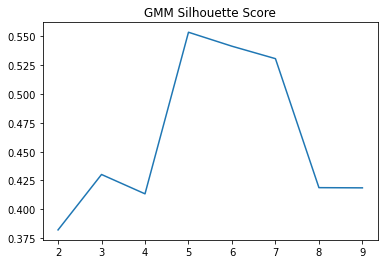

In [ ]:
scores = []
si_scores = []

k_start = 2
k_end = 10
k_list = range(k_start, k_end)

for k in k_list:
  gmm = GaussianMixture(n_components=k, random_state=seed)
  gmm.fit(X)
  cluster = gmm.predict(X)

  score =  -gmm.score(X)
  si_score = silhouette_score(X, cluster)

  scores.append(score)
  si_scores.append(si_score)

  print('cluster number=', k, ', Score : ', score, ', Silhouette : ', si_score)

plt.title('GMM Score')
plt.plot(k_list, scores)
plt.xticks(k_list)
plt.show()

plt.title('GMM Silhouette Score')
plt.plot(k_list, si_scores)
plt.xticks(k_list)
plt.show()

### GMM

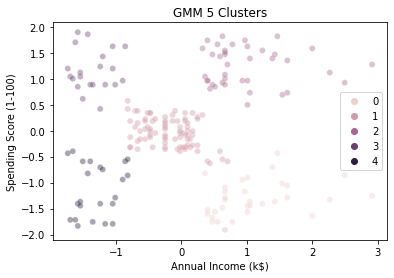

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=seed)
gmm.fit(X)
clusters = gmm.predict(X)

plt.title('GMM 5 Clusters')
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=clusters, alpha=0.4)

---